# COMMENTS FROM HJ ZHOU

- [x] How to argue more strongly in favor of the threshold infection rule? By the threshold theta, large-degree nodes will be more difficult to be infected than low-degree nodes. This is in direct contradiction with empirical evidence. Could there be major difference is a fixed number is set as the requirement to be infected (say three infected neighbors)?  
- [ ] When the connectivity of the two-modularity network is random, the no-epidemic boundary curve in the space of (rho_0, w_1, w_2) may be exactly derivable within the Tree-Like approximation framework. Optimization of cost is then a search along this boundary curve, given the value of rho_0. 


# Corresponds to Appendix S10 and S9

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import string

## Show the phase diagram in ER-ER-ER network with a different diffusion way 

Two-module network, the intra degree distribution satisfies Poisson distribution, the inter degree distribution satisfy power-law distribution.  
The other paramters: average degree of the whole network $z = 20$, initial infected density $\rho_0 = 0.17$, disease transfer factor $C = 3\, \& \, 4$.

In [5]:
def reSaveData(C_, mu_ = 0.2, lam_ = 0, N = 30):
    
    w1_list = np.linspace(0, 1, N).tolist()
    w2_list = np.linspace(0, 1, N).tolist()
    
    rho_0 = 0.17
#     theta = 0.1   
    file_path = os.path.join(os.getcwd(), "data", f"RHO_N_C{C_}grid{N}lam{lam_}mu{mu_}.dat")
    
    result_new = pickle.load(open(file_path, "rb"))
    w1_mesh, w2_mesh = np.meshgrid(w1_list, w2_list)
    rho = np.zeros((N, N, 2))
    
    for i in range(N):
        for j in range(N):            
            rho[j, i, :] = result_new[i + j * N][0][0]
                       
    rho_Inf =  rho[:, :, :].mean(axis = 2).T
    
    file_pathNew = os.path.join(os.getcwd(), "AnalysisData", f"C{C_}lam{lam_}mu{mu_}.h5")
    
    f = h5py.File(file_pathNew, 'w')
    
    f.create_dataset('w1', data = w1_list)
    f.create_dataset('w2', data = w2_list)
    f.create_dataset('rho', data = rho_Inf)
    f.create_dataset('rho_0', data = rho_0)
    f.create_dataset('C', data = C_)
    f.create_dataset('Method', data = "TL approximation")        
    f.close()


In [6]:
reSaveData(3, 0.2, 0, 40)
reSaveData(3, 0.8, 0, 40)

reSaveData(2, 0.2, 0, 40)
reSaveData(2, 0.8, 0, 40)

In [7]:
def plot_diagram(C_, lam_, mu_, ax1):
    
    loc = os.path.join("AnalysisData", f"C{C_}lam{lam_}mu{mu_}.h5")
    
    f= h5py.File(loc, 'r')
    
    w1_ = f["w1"][()]
    w2_ = f["w2"][()]
    rho = f["rho"][()]
    
    f.close()
       
    w1_mesh, w2_mesh = np.meshgrid(w1_, w2_)

    p1 = ax1.pcolor(w1_mesh, w2_mesh, rho, shading = 'auto', cmap='YlGnBu')
    p1.set_clim(0, 1)
    ax1.tick_params(axis='both', which='major', labelsize=13)
    ax1.set_xticks([0.0, 0.5, 1.0])
    ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#     plt.colorbar(p1, ax = ax1, label = r"$\rho_{\infty}$")
    ax1.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = 20)
    ax1.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 20)
    plt.tight_layout()
    
    return p1

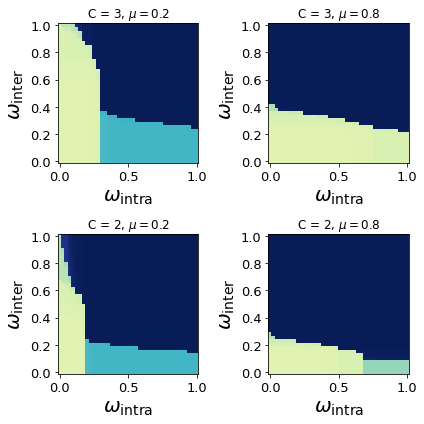

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (6, 6))

plot_diagram(3, 0, 0.2, ax[0, 0])
ax[0, 0].set_title(r"C = 3, $\mu = 0.2$")
plot_diagram(3, 0, 0.8,ax[0, 1])
ax[0, 1].set_title(r"C = 3, $\mu = 0.8$");

plot_diagram(2, 0, 0.2, ax[1, 0])
ax[1, 0].set_title(r"C = 2, $\mu = 0.2$")
plot_diagram(2, 0, 0.8,ax[1, 1])
ax[1, 1].set_title(r"C = 2, $\mu = 0.8$");

# This corresponds to Appendix S10 (named "appen_fix_num")

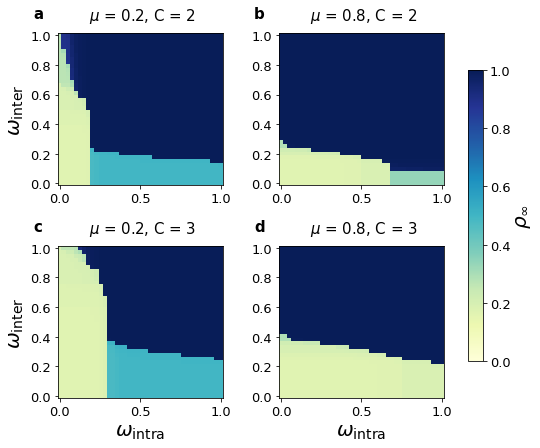

In [9]:
fig, ax1 = plt.subplots(2, 2, figsize = (8, 6))

p1 = plot_diagram(3, 0, 0.2, ax1[1, 0])
p2 = plot_diagram(3, 0, 0.8, ax1[1, 1])
p3 = plot_diagram(2, 0, 0.2, ax1[0, 0])
p4 = plot_diagram(2, 0, 0.8, ax1[0, 1])


ax1[0, 0].text(0.18, 1.1, r"$\mu$ = 0.2, C = 2", color = 'k', fontsize = 15)
ax1[0, 1].text(0.18, 1.1, r"$\mu$ = 0.8, C = 2", color = 'k', fontsize = 15)
ax1[1, 0].text(0.18, 1.1, r"$\mu$ = 0.2, C = 3", color = 'k', fontsize = 15)
ax1[1, 1].text(0.18, 1.1, r"$\mu$ = 0.8, C = 3", color = 'k', fontsize = 15)

ax1[0, 0].annotate(r"a", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 1].annotate(r"b", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 0].annotate(r"c", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 1].annotate(r"d", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')

for i in range(2): # 遍历行
    for j in range(2): # 遍历列
        ax = ax1[i, j]
        if i == 0:
            ax.set_xlabel(None)
        if j > 0:
            ax.set_ylabel(None)

fig.subplots_adjust(hspace = 0.4, wspace = 0.34, left = 0.13)
    
pc = fig.colorbar(p1, ax = ax1, shrink = 0.8, pad = 0.05)
pc.set_label(r"$\rho_\infty$", fontsize=20)
pc.ax.tick_params(labelsize=13)

plt.savefig("appen_fix_num.pdf", format='pdf', bbox_inches='tight', dpi = 600);

## Suppose the degree of all nodes are the same, say $z = 20$

In [10]:
def reSaveData(mu_, N = 50, theta_ = 0.1, rho0_ = 0.17):
    
    w1_list = np.linspace(0, 1, N).tolist()
    w2_list = np.linspace(0, 1, N).tolist()
    
    rho_0 = rho0_
#     theta = 0.1   
    file_path = os.path.join(os.getcwd(), "random-regular", f"theta{theta_}rho0_{rho0_}", f"RHO_N_mu{mu_}grid{N}.dat")
    
    result_new = pickle.load(open(file_path, "rb"))
    w1_mesh, w2_mesh = np.meshgrid(w1_list, w2_list)
    rho = np.zeros((N, N, 2))
    
    for i in range(N):
        for j in range(N):            
            rho[j, i, :] = result_new[i + j * N][0][0]
                       
    rho_Inf =  rho[:, :, :].mean(axis = 2).T
    
    file_pathNew = os.path.join(os.getcwd(), "random-regular", f"theta{theta_}rho0_{rho0_}", f"mu{mu_}.h5")
    
    f = h5py.File(file_pathNew, 'w')
    
    f.create_dataset('w1', data = w1_list)
    f.create_dataset('w2', data = w2_list)
    f.create_dataset('rho', data = rho_Inf)
    f.create_dataset('rho_0', data = rho_0)
    f.create_dataset('Method', data = "TL approximation")        
    f.close()
    
def plot_diagram(mu_, ax1, theta_ = 0.1, rho0_ = 0.17):
    
    loc = os.path.join("random-regular",  f"theta{theta_}rho0_{rho0_}", f"mu{mu_}.h5")
    
    f= h5py.File(loc, 'r')
    
    w1_ = f["w1"][()]
    w2_ = f["w2"][()]
    rho = f["rho"][()]
    
    f.close()
       
    w1_mesh, w2_mesh = np.meshgrid(w1_, w2_)

    p1 = ax1.pcolor(w1_mesh, w2_mesh, rho, shading = 'auto', cmap='YlGnBu')
    p1.set_clim(0, 1)
    ax1.tick_params(axis='both', which='major', labelsize=13)
    ax1.set_xticks([0.0, 0.5, 1.0])
    ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    ax1.set_xlabel(r"$\omega_{\mathrm{intra}}$", fontsize = 20)
    ax1.set_ylabel(r"$\omega_{\mathrm{inter}}$", fontsize = 20)
    plt.tight_layout()
       
    return p1
    

In [11]:
reSaveData(0.2, N = 50)
reSaveData(0.4, N = 50)
reSaveData(0.6, N = 50)
reSaveData(0.8, N = 50)


# This corresponds to Appendix S9 (named "append_RRR")

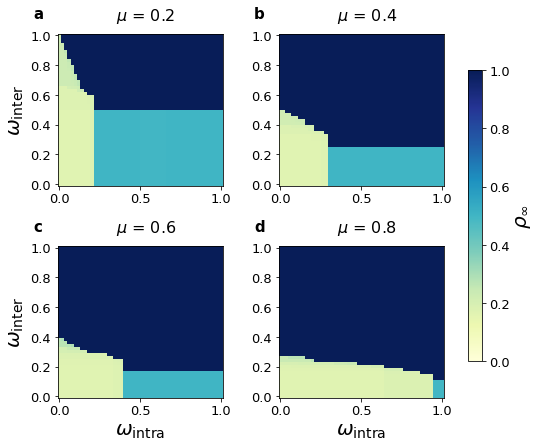

In [12]:
fig, ax1 = plt.subplots(2, 2, figsize = (8, 6))

plot_diagram(0.2, ax1[0, 0])
plot_diagram(0.4, ax1[0, 1])
plot_diagram(0.6, ax1[1, 0])
plot_diagram(0.8, ax1[1, 1])


ax1[0, 0].text(0.35, 1.1, "$\mu$ = 0.2", color = 'k', fontsize = 16)

ax1[0, 1].text(0.35, 1.1, "$\mu$ = 0.4", color = 'k', fontsize = 16)

ax1[1, 0].text(0.35, 1.1, "$\mu$ = 0.6", color = 'k', fontsize = 16)

ax1[1, 1].text(0.35, 1.1, "$\mu$ = 0.8", color = 'k', fontsize = 16)

ax1[0, 0].annotate(r"a", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[0, 1].annotate(r"b", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 0].annotate(r"c", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')
ax1[1, 1].annotate(r"d", (-0.15, 1.1), xycoords = 'axes fraction', fontsize = 15, fontweight='bold')

for i in range(2): # 遍历行
    for j in range(2): # 遍历列
        ax = ax1[i, j]
        if i == 0:
            ax.set_xlabel(None)
        if j > 0:
            ax.set_ylabel(None)
            
fig.subplots_adjust(hspace = 0.4, wspace = 0.34, left = 0.13)

pc = fig.colorbar(p1, ax = ax1, shrink = 0.8, pad = 0.05)
pc.set_label(r"$\rho_\infty$", fontsize=20)
pc.ax.tick_params(labelsize=13)

plt.savefig("equal_degree.pdf", format='pdf', bbox_inches='tight', dpi = 600)

#是论文附录的最后一个图appen_RRR